<p align="center"> <img src="https://drive.google.com/uc?export=view&id=19ig7YaRrHpMhKMiVvwtqRXRWYQS-Wous"> </p>


# Task - 2 Stock Market Prediction and Forecasting using Stacked LSTM

##### ***Author: Saumya Gupta, Data Science Intern at LetsGrowMore***

Link for the dataset: https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv


# Importing the necessary libraries

In [235]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

# Loading the dataset

In [236]:
#Import the data and remove rows containing NAN values
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
data = data.iloc[::-1]

### Displaying the first five rows of the dataset

In [237]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


### Displaying the last five rows

In [238]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


###Displaying information about the dataset

In [239]:
data.shape

(2035, 8)

In [240]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

The dataset has 8 columns namely:
* **Date:** Date of trade.
* **Open:** Opening price of a stock.
* **High:** Highest price of a day.
* **Low:** Lowest price in a day.
* **Last:** Last price.
* **Close:** Closing price.
* **Total Trade Quantity:**  Total trade quantity of each day.
* **Turnover (Lacs):** Total Turnover in Lacs.

In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 2034 to 0
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [242]:
data.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

# Data Cleaning and Preprocessing

### Checking for the null values

In [243]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

**Observations:**
* There are no missing values in the dataset

### Checking for the duplicate values

In [244]:
duplicates = data.duplicated()
duplicates.value_counts()

False    2035
dtype: int64

**Observations:**
* There are no duplicate values in the dataset

# Statistical Description of the Dataset

In [245]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


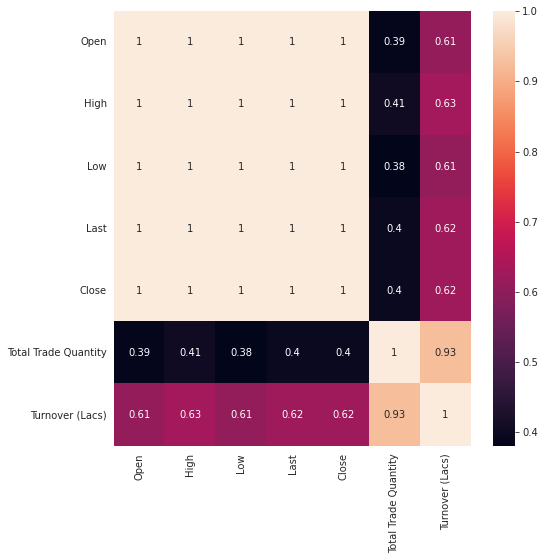

In [246]:
plt.figure(figsize = (8,8))
sns.heatmap(data.corr(), annot = True)

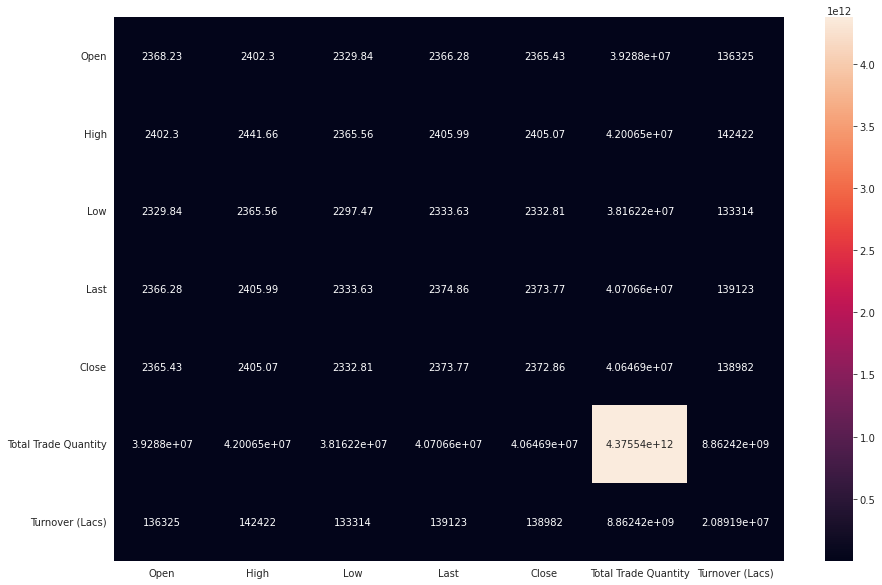

In [247]:
plt.figure(figsize = (15,10))
sns.heatmap(data.cov(), annot = True, fmt = 'g')
plt.show()

#Data Visualisation

### Plotting the graphs for Open, Close, High, Low, & Last price

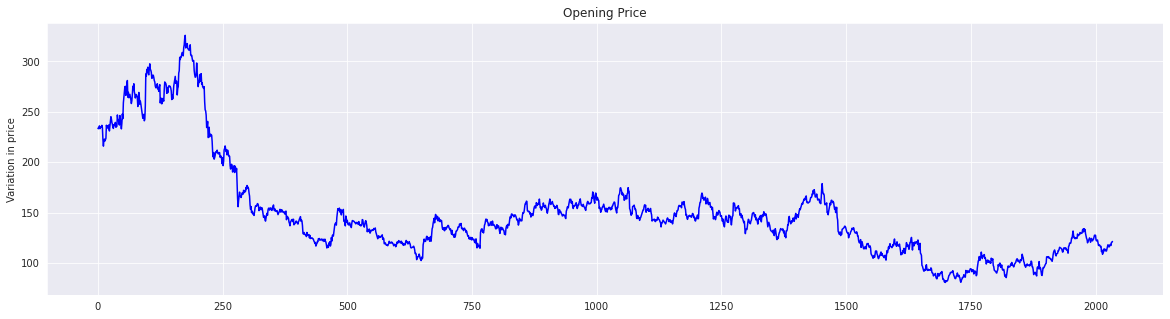

In [248]:
sns.set_style('darkgrid')
plt.figure(figsize = (20,5))
plt.plot(data.Close, color = 'b')
plt.ylabel('Variation in price')
plt.title("Opening Price")
plt.show()

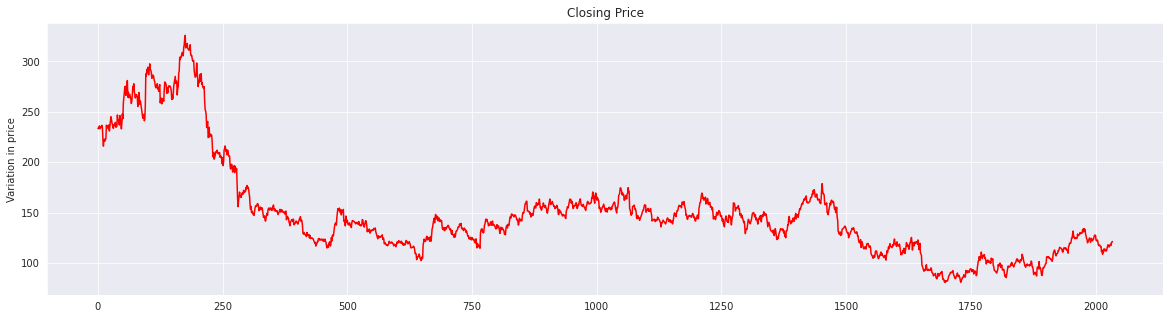

In [249]:
sns.set_style('darkgrid')
plt.figure(figsize = (20,5))
plt.plot(data.Close, color = 'r')
plt.ylabel('Variation in price')
plt.title("Closing Price")
plt.show()

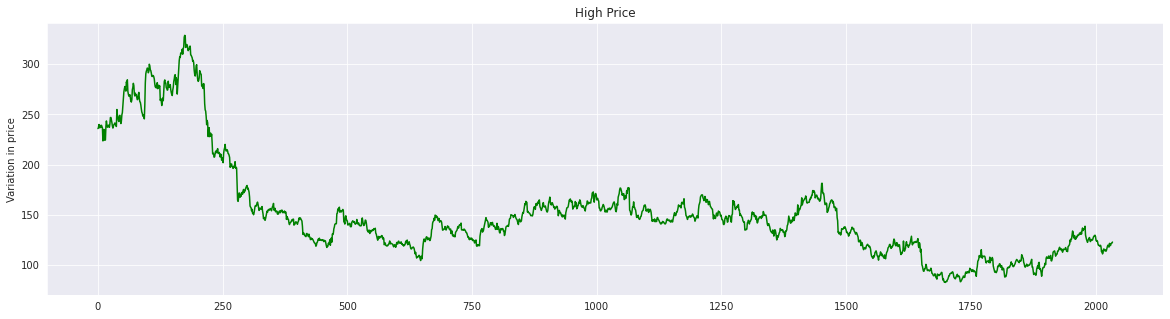

In [250]:
sns.set_style('darkgrid')
plt.figure(figsize = (20,5))
plt.plot(data.High, color = 'g')
plt.ylabel('Variation in price')
plt.title("High Price")
plt.show()

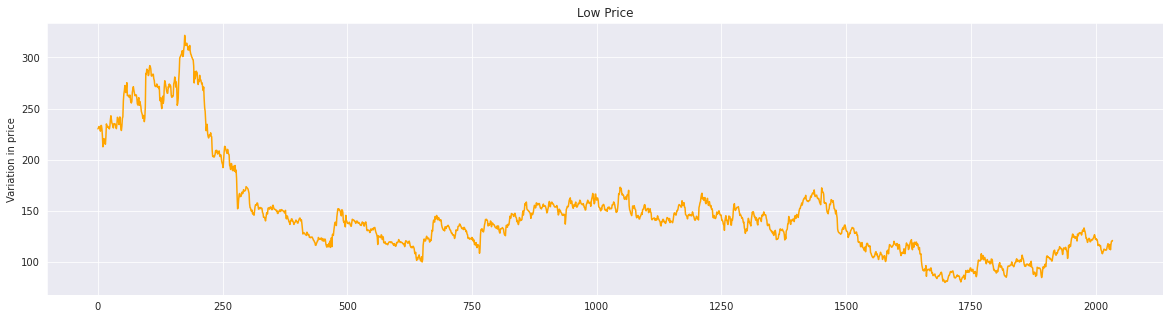

In [251]:
sns.set_style('darkgrid')
plt.figure(figsize = (20,5))
plt.plot(data.Low, color = 'Orange')
plt.ylabel('Variation in price')
plt.title("Low Price")
plt.show()

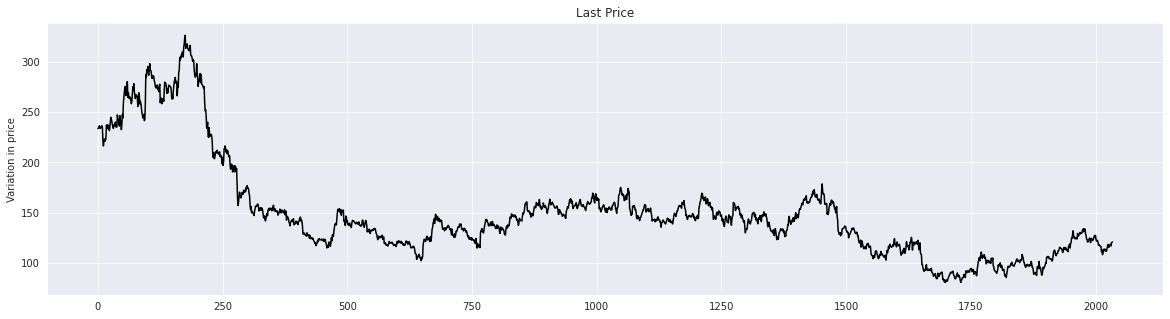

In [252]:
sns.set_style('darkgrid')
plt.figure(figsize = (20,5))
plt.plot(data.Last, color = 'Black')
plt.ylabel('Variation in price')
plt.title("Last Price")
plt.show()

In [253]:
data.Date = pd.to_datetime(data.Date,format="%Y-%m-%d")
data.index = data['Date']
data.drop('Date', axis = 1,inplace = True)
data

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60


# Building the model

In [254]:
data_high=data.reset_index()['High']

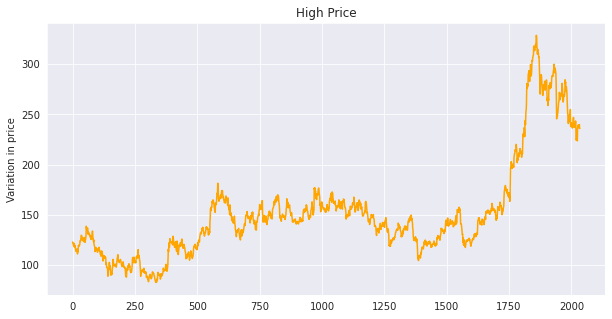

In [255]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
plt.plot(data_high, color = 'Orange')
plt.ylabel('Variation in price')
plt.title("High Price")
plt.show()


## Feature Scaling

As LSTM are not robust to the scale of the data, so we apply MinMax Scaler to transform our values in the range of 0 and 1.

In [256]:
scaler = MinMaxScaler(feature_range = (0,1))
data_high = scaler.fit_transform(np.array(data_high).reshape(-1,1))

In [257]:
data_high.shape

(2035, 1)

In [258]:
data_high

array([[0.16344786],
       [0.15938199],
       [0.15917869],
       ...,
       [0.6391543 ],
       [0.62614353],
       [0.62268754]])

#Splitting the data into train and test sets

In [259]:
training_size = int(len(data_high) * 0.75)
test_size = len(data_high) - training_size
train_data, test_data = data_high[0:training_size,:], data_high[training_size:len(data_high),:1]


In [260]:
training_size,test_size

(1526, 509)

In [261]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)


In [262]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)


### Reshaping the input to (samples, time steps, features)

In [263]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [264]:
print("The shape of X_train is : ", X_train.shape), print("The shape of Y_train is : ", Y_train.shape)

The shape of X_train is :  (1425, 100, 1)
The shape of Y_train is :  (1425,)


(None, None)

In [265]:
print("The shape of X_test is : ", X_test.shape), print("The shape of Y_test is : ", Y_test.shape)


The shape of X_test is :  (408, 100, 1)
The shape of Y_test is :  (408,)


(None, None)

# Creating the LSTM Model

In [266]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')


In [267]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_19 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_20 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [268]:
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 23s 413ms/step - loss: 0.0103 - val_loss: 0.0224
Epoch 2/100
23/23 [==============================] - 8s 368ms/step - loss: 0.0019 - val_loss: 0.0034
Epoch 3/100
23/23 [==============================] - 9s 374ms/step - loss: 8.0494e-04 - val_loss: 0.0043
Epoch 4/100
23/23 [==============================] - 9s 381ms/step - loss: 7.6284e-04 - val_loss: 0.0034
Epoch 5/100
23/23 [==============================] - 8s 366ms/step - loss: 7.4290e-04 - val_loss: 0.0033
Epoch 6/100
23/23 [==============================] - 9s 371ms/step - loss: 7.0460e-04 - val_loss: 0.0030
Epoch 7/100
23/23 [==============================] - 9s 379ms/step - loss: 6.9956e-04 - val_loss: 0.0025
Epoch 8/100
23/23 [==============================] - 9s 375ms/step - loss: 6.6793e-04 - val_loss: 0.0030
Epoch 9/100
23/23 [==============================] - 9s 378ms/step - loss: 6.4258e-04 - val_loss: 0.0023
Epoch 10/100
23/23 [==============================] - 9s 371ms

### Making predictions

In [269]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [270]:
#Transforming to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

### Model Evaluation 
####Calculating RMSE performance metrics

In [271]:
math.sqrt(mean_squared_error(Y_train, train_predict))

136.39513741016358

### Plotting the results

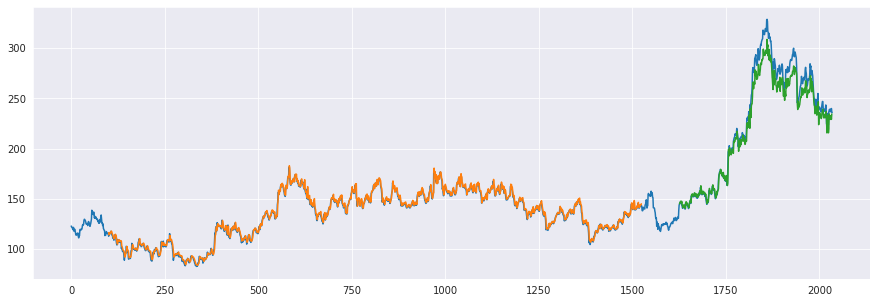

In [272]:
#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(data_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(data_high)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(data_high) - 1, :] = test_predict

#Plot baseline and predictions
plt.figure(figsize=(15,5))
plt.plot(scaler.inverse_transform(data_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

**Note:**
In the above graph,
* Green indicates the Predicted Data
* Blue indicates the Complete Data
* Orange indicates the Train Data


## Making predictions for next 30 days

In [273]:
len(test_data), X_test.shape

(509, (408, 100, 1))

In [274]:
X_input = test_data[409:].reshape(1,-1)
X_input.shape


(1, 100)

In [275]:
temp_input = list(X_input)
temp_input = temp_input[0].tolist()

In [276]:
lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[0.51339686]
101
1 day input [0.86013417 0.85464525 0.84448059 0.8072779  0.71843871 0.66192316
 0.67696686 0.67554381 0.67310429 0.68428542 0.68936776 0.70217524
 0.71803212 0.72941655 0.73144948 0.74486684 0.76926205 0.75991055
 0.74242732 0.73958122 0.74771295 0.75991055 0.7584875  0.76621264
 0.75462492 0.76316324 0.79670665 0.80585485 0.7889815  0.78003659
 0.73978451 0.73002643 0.73490547 0.74872942 0.75991055 0.75462492
 0.75401504 0.76174019 0.7737345  0.82008538 0.80585485 0.81154706
 0.77434438 0.78633869 0.79284407 0.78328929 0.77109169 0.74385038
 0.71193332 0.68733482 0.67818662 0.65257166 0.64301687 0.65643423
 0.67656028 0.67371417 0.65114861 0.65521447 0.66761537 0.67838992
 0.69993901 0.63122586 0.63508843 0.64098394 0.64545639 0.64118723
 0.63854442 0.63081927 0.62472047 0.6330555  0.64728603 0.6574507
 0.66761537 0.66720878 0.64159382 0.62776987 0.63651149 0.63630819
 0.62980281 0.62817646 0.63813783 0.65358813 0.63183574 0.57653995
 0.57816629 0.57613336 0.61943484 

In [277]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [278]:
day_new.shape

(100,)

In [279]:
day_pred.shape

(30,)

In [280]:
data_new = data_high.tolist()
data_new.extend(lst_output)


In [281]:
len(data_high)

2035

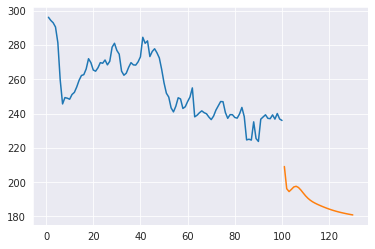

In [282]:
plt.plot(day_new, scaler.inverse_transform(data_high[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

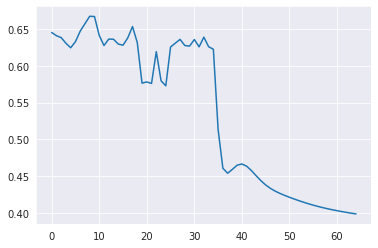

In [283]:

data_new = data_high.tolist()
data_new.extend(lst_output)
plt.plot(data_new[2000:])

In [284]:
data_new = scaler.inverse_transform(df3).tolist()

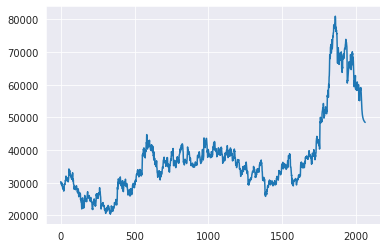

In [285]:
plt.plot(data_new)

## Thank You!